Кратко про Tensorflow

Tensorflow (с англ. поток тензоров) - фреймворки глубокого обучения , который позволяет создавать высокопроизводительные системы машинного обучения. В самом фреймворке вычисления представлены в виде data-flow графов , где ребрами являются тензоры , а вершины вычислениями

Немного про тензоры

Тензоры это неизменяемы n-мерные массивы, такие как вектора и матрицы, с единим типом (dtype). В данном разделе мы рассмотрим простые операции с ними.


Скачиваем необходимые библиотеки

In [ ]:
!pip install tensorflow
!pip install sklearn
!pip install tensorflow

Импортируем Tensorflow

In [2]:
import tensorflow as tf

Создадим 2 простых двумерных *тензора*

In [3]:
tensor_1 = tf.constant([[1, 2, 3, 4],
                       [5, 6, 7, 8],
                       [9, 10, 11, 12]])
tensor_2 = tf.constant([[13, 14, 15, 16],
                       [17, 18, 19, 20],
                       [21, 22, 23, 24]])

Получим параметры тензора под номером 1, а именно тип данных, количество измерений, вид и общее количество измерений

In [7]:
print(tensor_1.dtype)
print(tensor_1.ndim)
print(tensor_1.shape)
print(tf.size(tensor_1).numpy())

<dtype: 'int32'>
2
(3, 4)
12


Произведем математические операции над данными тензорами

In [9]:
tf.matmul(tensor_1, tensor_2)

InvalidArgumentError: ignored

Видим свою первую ошибку и чтобы ее решить нам надо вспомнить правило умножения матрицы , а оно возможно только если количество строк первой матрицы равно количесту столбцов второй. Также тут увидим еще один метод работы с матрицами - транспонировае , он позволяет зеркально отразить матрицу относительно главной диагонали

In [10]:
tf.transpose(tensor_1)

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]], dtype=int32)>

Первую матрицу можно умножить на транспонированную вторую , что мы и сделаем

In [11]:
tf.matmul(tensor_1, tf.transpose(tensor_2))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[150, 190, 230],
       [382, 486, 590],
       [614, 782, 950]], dtype=int32)>

После того как мы разобрались с тензорными операциями , мы можем перейте к другой основной структуре в tensorflow - графами вычислений и научимся представлять в таком виде простые математические операции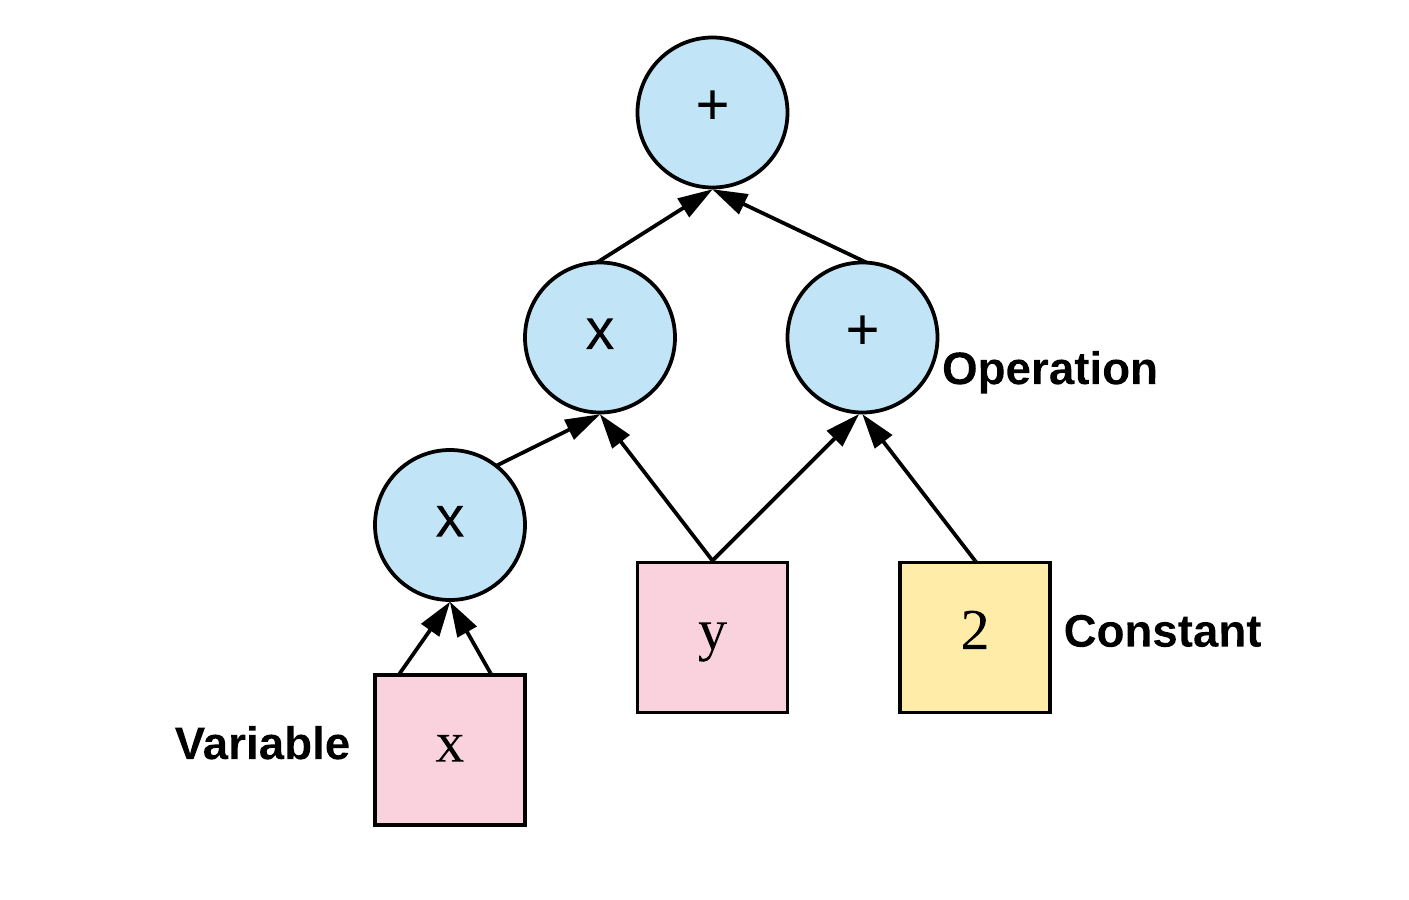

In [22]:
# Сначала определим математическую функцию

def func(x, y):
  return x*x*y + y + 2

#Переводим функцию на графовые вычисления при помощи создания экземпляра класса Function

graph_func = tf.function(func)

print(graph_func(tf.constant(2), tf.constant(6)))

tf.Tensor(32, shape=(), dtype=int32)


Теперь построим базовую нейросеть , которой достаточно для представленной нам задачи регресии


Импортируем необходимые нам библиотеки

In [158]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

Импортируем данные и заполним пропуски нулями

In [85]:
data = pd.read_csv("/content/SolubilityDataset.csv")

Разделим данные на тренировочные и тестовые

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ["SMILES", "Solubility"],axis=1), data["Solubility"], test_size=0.3, random_state=42)

Начнем поэтапно создавать нейронную сеть. Но важно учесть , что это имеет смысл только после обработки данных

In [159]:
#Sequential - последовательная модель

model = Sequential()

In [160]:
#Добавим первый слой, на вход которому идут наши данные
#Dense - классический полносвязный слой , где

model.add(Dense(units=1, input_shape=(X_train.shape[1],)))


In [161]:
#Теперь будем постепенно добавлять новые слои , это основной способ изменения результатов , которые вы будете получать
#Тут мы добавим полносвязный слой, который состоит из 8 нейронов и функция активации sigmoid

model.add(Dense(8, activation='sigmoid'))
model.add(Dropout(0.8))

Небольшое отступление про функцию активации - это математическая функция , аргументом которой является скалярное произведение вектора весов и вектора входа нейронов и также смещение (bias)
Разные функции активации представляют разные математические выражения , что удобно посмотреть здесь https://keras.io/api/layers/activations/

In [162]:
#Последний штрих, добавим слой выхода

model.add(Dense(1, activation='sigmoid'))

In [163]:
#Зададим функцию потерь (функции, оптимум которой мы будем искать во время обучения),
# оптимизатор (алгоритм оптимизации весов модели) и метрики (mse - среднеквадратичная ошибка), которые мы будем видеть при обучении

model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['mse'])

In [ ]:
#Обучение модели - в качестве аргументов принимает обучающую выборку, количество эпох обучения и процент выборки, который используется при валидации

model.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
186/186 [==============================] - 2s 5ms/step - loss: 3.4535 - mse: 17.2580 - val_loss: 3.4814 - val_mse: 17.5308
Epoch 2/50
186/186 [==============================] - 1s 4ms/step - loss: 3.3292 - mse: 16.3390 - val_loss: 3.3486 - val_mse: 16.4940
Epoch 3/50
186/186 [==============================] - 1s 3ms/step - loss: 3.2433 - mse: 15.6830 - val_loss: 3.2705 - val_mse: 15.8843
Epoch 4/50
186/186 [==============================] - 0s 2ms/step - loss: 3.1890 - mse: 15.2641 - val_loss: 3.2285 - val_mse: 15.5586
Epoch 5/50
186/186 [==============================] - 0s 2ms/step - loss: 3.1557 - mse: 15.0055 - val_loss: 3.2027 - val_mse: 15.3595
Epoch 6/50
186/186 [==============================] - 0s 2ms/step - loss: 3.1361 - mse: 14.8536 - val_loss: 3.1855 - val_mse: 15.2274
Epoch 7/50
186/186 [==============================] - 0s 2ms/step - loss: 3.1215 - mse: 14.7533 - val_loss: 3.1732 - val_mse: 15.1333
Epoch 8/50
186/186 [==============================] - 0s 2ms/s

Как мы видим на данный момент метрик выглядят не очень хорошо , однако нейронные сети являются очень гибким и мощным инструментом, поэтому при желании вы сможете продвинуться в решении задачи.
Per aspera ad astra

In [ ]:
# Напоследок рассмотрим такой слой как Dropout, основной его задачей
# является борьба с переобучением нейронных сетей, в зависимости от аргумента , который может быть от 0 до 1, этот слой удаляет "слабые" связи
#Добавляется он вот так: model.add(Dropout(x))